##### Two data sets : 1. googleplaystore.csv    2. googleplaystore_user_reviews.csv

In [63]:
# Import all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [64]:
# read playstore applications data from csv
apps = pd.read_excel('googleplaystore.xlsx')

In [65]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


In [66]:
apps.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,2018-07-25 00:00:00,Varies with device,Varies with device


In [67]:
apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## DATA CLEANING STAGE

### 1.  Find number of missing values

In [68]:
apps.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [69]:
apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##### There are 1474 values missing in Rating column, 1 in Type, 1 in Content Rating, 8 in current version, and 3 in android version.
##### We can drop missing records of Type and Content Rating as its count is much less than the size of dataframe, but we can't drop null values of Rating because it has 1474 record with missing data

In [70]:
# check whether the record with missing type contains some useful information. if yes, donot drop, otherwise drop
apps[apps.Type.isna()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,2018-06-28 00:00:00,Varies with device,Varies with device


In [71]:
apps.Type.value_counts()

Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64

In [72]:
# drop records with missing type and content rating

apps.dropna(subset=['Type', 'Content Rating'], axis=0, inplace=True)

In [73]:
apps.isna().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### 2. Remove Duplicate Records

##### As thisi data is all about applications of google play store, so different information for same application may lead to ambiguity. Remove all duplicates wo can perform analysis on much clean data

In [74]:
apps.duplicated().any()

True

In [75]:
# drop duplicates and update the dataframe

apps.drop_duplicates(inplace=True)

In [76]:
# cross check is there are still some duplicates

apps.duplicated().any()

False

In [77]:
# check the number of missing values in Rating after removing duplicates

apps.isna().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### 3. Correcting Data Types of each Attribute

##### Improper data type of attributes could make analysis more difficult and incorrect, for example if a datetime column is interpreted as string by python then you wouldn't be able to extract useful information from date like month, year or day easily, similarly if integer or float column is interpreted as string then you wouldn't be able to calculate its avergae or total. So, in order to simplify our analysis we should first correct our data types

In [78]:
# finding the data types of each attribute 

apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10356 non-null  object 
 1   Category        10356 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10356 non-null  object 
 4   Size            10356 non-null  object 
 5   Installs        10356 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10356 non-null  object 
 8   Content Rating  10356 non-null  object 
 9   Genres          10356 non-null  object 
 10  Last Updated    10356 non-null  object 
 11  Current Ver     10348 non-null  object 
 12  Android Ver     10354 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [79]:
apps[apps.Type == 'Paid'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25 00:00:00,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11 00:00:00,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05 00:00:00,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19 00:00:00,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25 00:00:00,1.1.6,4.0 and up


##### Here, we can easily see some special characters in Price and Installs columns. We can't convert string to integer if it doesn't contain all digits and no special characters or alphabets. So, firstly we have to remove these special characters

In [80]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']

# Columns from which to remove special characters
cols_to_clean = ['Reviews', 'Installs', 'Price']
for col in cols_to_clean:
    # Convert the column to string type to ensure all values are strings
    apps[col] = apps[col].astype(str)
    for char in chars_to_remove:
        # Apply the replace operation to each string value in the column
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

# Displaying apps where the Type is "Paid"
apps_paid = apps[apps.Type == "Paid"]

##### Content Rating column contains some complicated or we can say ambiguous/uncleaned values so replace them with simple ones 

In [81]:
apps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [82]:
# replace 'everyone 10+' to only '10+', 'Mature 17+' to 'Mature', and 'Adults only 18+' to 'Adults' only

apps['Content Rating'].replace(['Everyone 10+', 'Mature 17+', 'Adults only 18+'], ['10+', 'Mature', 'Adults'], inplace=True)

In [83]:
apps['Content Rating'].unique()

array(['Everyone', 'Teen', '10+', 'Mature', 'Adults', 'Unrated'],
      dtype=object)

##### Now we have corrected the values of Price, Installs, Reviews (if it contains any special character), and Content Rating. Next step is to change their data types
##### Content Rating, Type and Category has discrete values thus are categorical so, change their data type to categorical
##### Price contain floating point number, and Installs and Reviews contain integer values

In [84]:
apps['Content Rating'] = apps['Content Rating'].astype('category')

In [85]:
apps.Price = apps.Price.astype('float64')
apps.Installs = apps.Installs.astype('int')
apps.Reviews = apps.Reviews.astype('int')
apps.Type = apps.Type.astype('category')
apps.Category = apps.Category.astype('category')

In [86]:
# convert genres to category and last updated to datetime object as it contains dates

apps.Genres = apps.Genres.astype('category')
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

In [87]:
# check the data type of each attribute

apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10356 non-null  object        
 1   Category        10356 non-null  category      
 2   Rating          8892 non-null   float64       
 3   Reviews         10356 non-null  int32         
 4   Size            10356 non-null  object        
 5   Installs        10356 non-null  int32         
 6   Type            10356 non-null  category      
 7   Price           10356 non-null  float64       
 8   Content Rating  10356 non-null  category      
 9   Genres          10356 non-null  category      
 10  Last Updated    10356 non-null  datetime64[ns]
 11  Current Ver     10348 non-null  object        
 12  Android Ver     10354 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 775.2+ KB


### 4. Select Interested/Informative Attributes Only

##### To perform on all attributes without having their need usually considered as illogical thing, So sliced your dataframe before doing EDA everytime. Here, I am not interested in doing analysis on current or android versions of application so I m ignoring these attributes and storing all others as apps2

In [88]:
# Pick out all rows and columns from 'App' to 'Last Updated' i.e from 0 to 10

apps2 = apps.iloc[:, :11]
apps2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0.0,Everyone,Medical,2017-01-20
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature,Books & Reference,2015-01-19


## EXPLORATORY DATA ANALYSIS

### Most Rated Apps (Top 10) (Histograms)

In [89]:
# apps2.sort_values('Rating', ascending=False).head(10)

top_rated = apps2.nlargest(10, 'Rating')
top_rated

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,1000,Free,0.0,Everyone,Comics,2018-06-26
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,1000,Free,0.0,Mature,Dating,2018-07-17
615,Awake Dating,DATING,5.0,2,70M,100,Free,0.0,Mature,Dating,2018-07-24
633,Spine- The dating app,DATING,5.0,5,9.3M,500,Free,0.0,Teen,Dating,2018-07-14
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100,Free,0.0,Mature,Dating,2018-08-01
640,Online Girls Chat Group,DATING,5.0,5,5.0M,100,Free,0.0,Mature,Dating,2018-08-02
654,Speeding Joyride & Car Meet App,DATING,5.0,3,25M,100,Free,0.0,Mature,Dating,2018-07-20
1028,SUMMER SONIC app,EVENTS,5.0,4,61M,500,Free,0.0,Everyone,Events,2018-07-24
1030,Prosperity,EVENTS,5.0,16,2.3M,100,Free,0.0,Everyone,Events,2018-07-09
1038,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21M,100,Free,0.0,Everyone,Events,2018-07-03


### Categories of Highly Rated  Apps

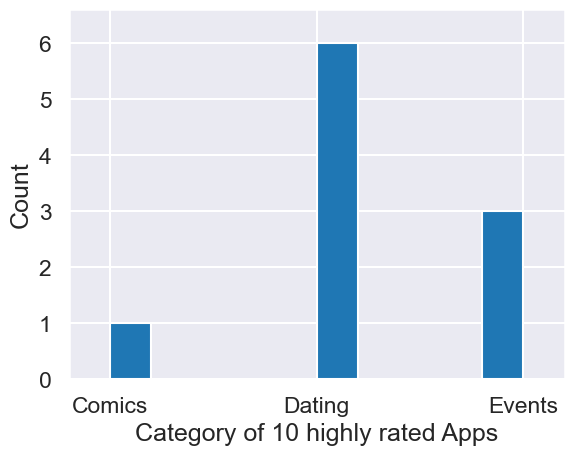

In [90]:
sns.set_style('darkgrid')
plt.hist(top_rated['Genres'])
plt.xlabel('Category of 10 highly rated Apps')
plt.ylabel('Count')
plt.margins(0.10)
plt.show()

##### Out of 10 highly rated applications, 6 were of type 'DATING' , 3 were of type 'EVENTS', and only 1 belongs to the category of 'COMICS'

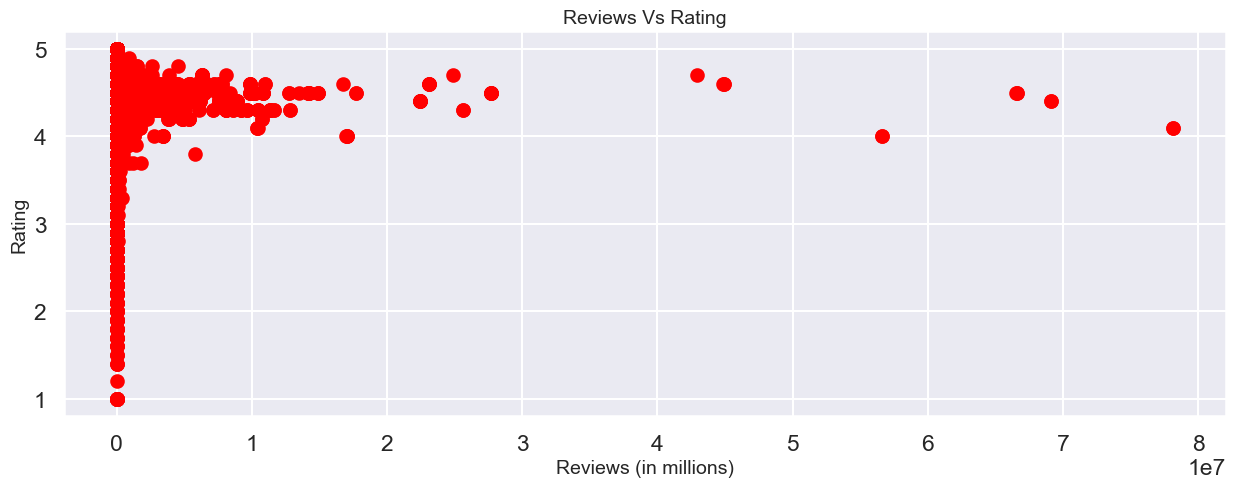

In [91]:
plt.figure(figsize=(15, 5))

plt.scatter(apps2["Reviews"], apps2["Rating"], color="r")
plt.xlabel("Reviews (in millions)", fontsize=14)
plt.ylabel("Rating", fontsize=14)
plt.title("Reviews Vs Rating", fontsize=14)

plt.show()

In [92]:
apps2['Installs'].max()

1000000000

In [93]:
apps2['Reviews'].max()

78158306

## Exploring Categories of applications

Total Categories: 33


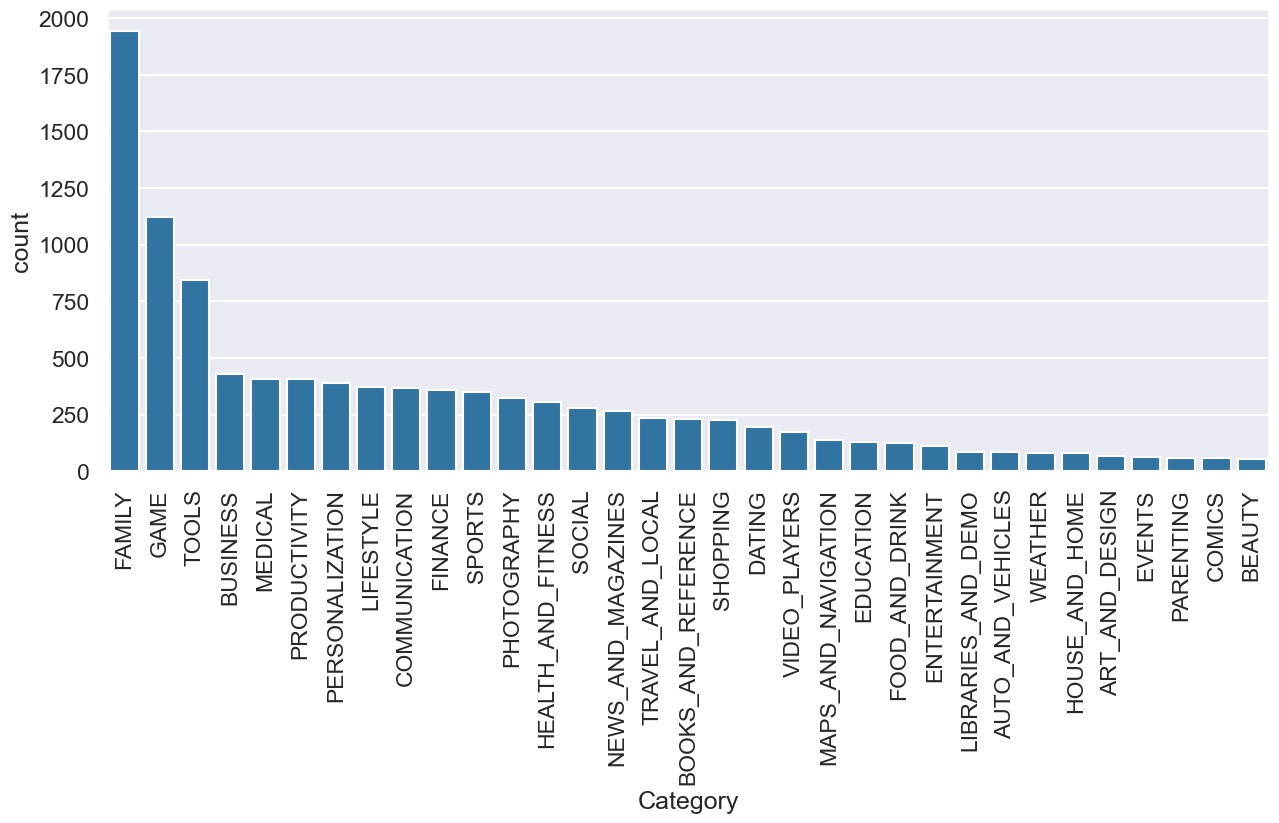

In [95]:
#Number of categories
print("Total Categories: {}".format(len(apps2.Category.unique())))

plt.figure(figsize=[15, 6])
sns.set_context('talk')
sns.countplot(x='Category', data = apps2, order=apps2.Category.value_counts().index)
plt.xticks(rotation=90)

plt.show()

##### Most of the applications belongs to the category of FAMILY, then GAMES, and then TOOLS, BUSINESS and MEDICAL. The rest have less count or less innovations

## Distribution of App Ratings (kde plot)

Average Rating: 4.187876743139902


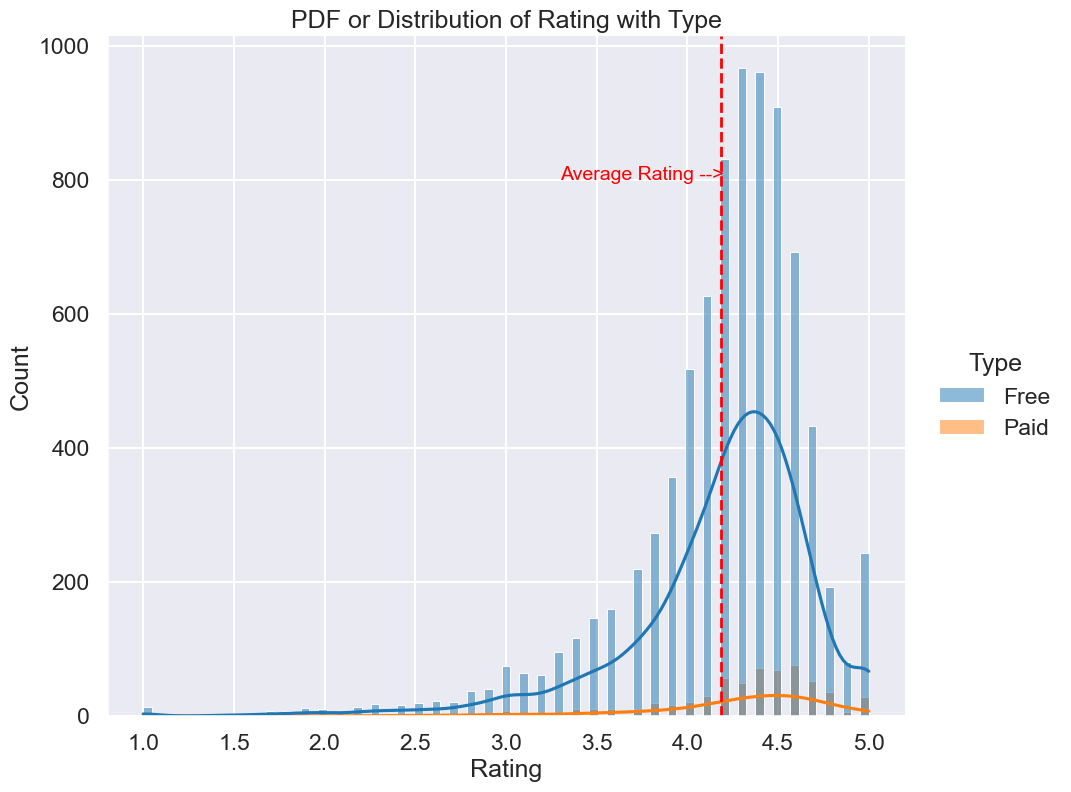

In [96]:
# Distribution of paid and unpaid applications rating

avg_rating = apps2.Rating.mean()
print("Average Rating: {}".format(avg_rating))

sns.displot(data=apps2, x='Rating', kde=True, hue='Type', height=8, aspect=1.2)

plt.axvline(avg_rating, linestyle='--', color = 'red', linewidth = 2.0)

plt.text(3.3, 800, 'Average Rating -->', color = 'red', fontsize=14)

plt.title('PDF or Distribution of Rating with Type', fontsize=18)
plt.show()

##### Mean average rating is approx 4.2. We can say that rating is negatively skewed or exponentially increasing. But for Paid apps ratio of rating is quite less than Free apps. 

#### Free and Paid Apps rating is negatively skewed ass tail extends from left hand side

##### Now we are about to end this analysis after exploring which type of applications get greater number of reviews and then we will perform sentiment analysis on reviews csv of playstore applications to find apps with positive reviews and rating

# Sentiment Anaysis Based on Reviews

##### We can draw conclusion from reviews of users 

In [97]:
reviews_df = pd.read_excel("googleplaystore.xlsx")
reviews_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


In [98]:
# check for null values
reviews_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [99]:
# check duplicates
reviews_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [100]:
reviews_df.loc[(reviews_df.duplicated()==True)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,2018-02-26 00:00:00,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,2018-07-31 00:00:00,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,2018-07-24 00:00:00,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,2018-07-20 00:00:00,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,2018-07-16 00:00:00,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,2018-04-06 00:00:00,Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,2018-08-06 00:00:00,Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,2018-06-27 00:00:00,Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,2018-06-01 00:00:00,0.6.88,5.0 and up


In [101]:
# drop duplicates
reviews_df.drop_duplicates(inplace=True)

In [102]:
reviews_df.shape

(10358, 13)

In [103]:
# after removing duplice records we are left with relatively small amount of null values
reviews_df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Merge previous application dataframe with this review dataframe to explore reviews of free, paid, and popular category of apps

In [104]:
app_df = reviews_df.merge(apps2, on=['App'], suffixes=('_rev', '_org'))
app_df.head()

,App,Category_rev,Rating_rev,Reviews_rev,Size_rev,Installs_rev,Type_rev,Price_rev,Content Rating_rev,Genres_rev,...,Category_org,Rating_org,Reviews_org,Size_org,Installs_org,Type_org,Price_org,Content Rating_org,Genres_org,Last Updated_org
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,FAMILY,3.9,974,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08


In [105]:
print(app_df.columns)

Index(['App', 'Category_rev', 'Rating_rev', 'Reviews_rev', 'Size_rev',
       'Installs_rev', 'Type_rev', 'Price_rev', 'Content Rating_rev',
       'Genres_rev', 'Last Updated_rev', 'Current Ver', 'Android Ver',
       'Category_org', 'Rating_org', 'Reviews_org', 'Size_org', 'Installs_org',
       'Type_org', 'Price_org', 'Content Rating_org', 'Genres_org',
       'Last Updated_org'],
      dtype='object')


In [106]:
app_df.shape

(12304, 23)

In [107]:
from textblob import TextBlob

# Convert 'Reviews_rev' column to string type
app_df['Reviews_rev'] = app_df['Reviews_rev'].astype(str)

# Perform sentiment analysis
app_df['Sentiment'] = app_df['Reviews_rev'].apply(lambda review: TextBlob(review).sentiment.polarity)

# Categorize sentiment into Positive, Neutral, Negative
app_df['Sentiment'] = app_df['Sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

print(app_df[['Reviews_rev', 'Sentiment']].head())

  Reviews_rev Sentiment
0         159   Neutral
1         967   Neutral
2         967   Neutral
3       87510   Neutral
4      215644   Neutral


In [108]:
# group applications based on their category and then sentiment to find out the proportion of positive, negative, and neutral reviews of popular categories
category_sent = app_df.groupby('Category_rev', group_keys=False)['Sentiment'].value_counts(normalize=True).rename('proportion').reset_index()
category_sent

,Category_rev,Sentiment,proportion
0,ART_AND_DESIGN,Neutral,1.0
1,AUTO_AND_VEHICLES,Neutral,1.0
2,BEAUTY,Neutral,1.0
3,BOOKS_AND_REFERENCE,Neutral,1.0
4,BUSINESS,Neutral,1.0
5,COMICS,Neutral,1.0
6,COMMUNICATION,Neutral,1.0
7,DATING,Neutral,1.0
8,EDUCATION,Neutral,1.0
9,ENTERTAINMENT,Neutral,1.0


In [109]:
imp_cats = ['FINANCE', 'BUSINESS', 'HEALTH', 'SOCIAL', 'LIFESTYLE', 'TOOLS', 'GAME', 'COMMUNICATION', 'EDUCATION']


# from all above categories pick out records with popular categories only

sent_of_pop_cat = category_sent[category_sent.Category_rev.isin(imp_cats)]
sent_of_pop_cat

,Category_rev,Sentiment,proportion
4,BUSINESS,Neutral,1.0
6,COMMUNICATION,Neutral,1.0
8,EDUCATION,Neutral,1.0
12,FINANCE,Neutral,1.0
14,GAME,Neutral,1.0
18,LIFESTYLE,Neutral,1.0
27,SOCIAL,Neutral,1.0
29,TOOLS,Neutral,1.0


## Using PLOTLY to plot proportion of sentiment of each category

In [110]:
fig = px.bar(sent_of_pop_cat, x="proportion", y="Category_rev", color="Sentiment", barmode="group",
             color_discrete_sequence=px.colors.qualitative.Safe, hover_name="Sentiment",
             category_orders={ "Sentiment": ["Positive", "Negative", "Neutral"]})

fig.update_layout(barmode='stack', title="Sentiment Proportion Along Category")
fig.update_xaxes(showgrid=True, ticks="outside", tickson="boundaries")

fig.show()

##### Education, comminucation, and Lifestyle applications usually get positive response, Games get most negative comments as compared to other applications

## Do the above same work to find out the effect of sentiments on type of application

In [111]:
# group applications on the basis of their type (paid, free) and then sentiments
type_sent = app_df.groupby('Type_rev')['Sentiment'].value_counts(normalize=True).rename('percent').reset_index()
type_sent

,Type_rev,Sentiment,percent
0,Free,Neutral,1.0
1,Paid,Neutral,1.0


##### In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.